### Image classification using `CIFAR-10` dataset

Link: https://www.cs.toronto.edu/~kriz/cifar.html

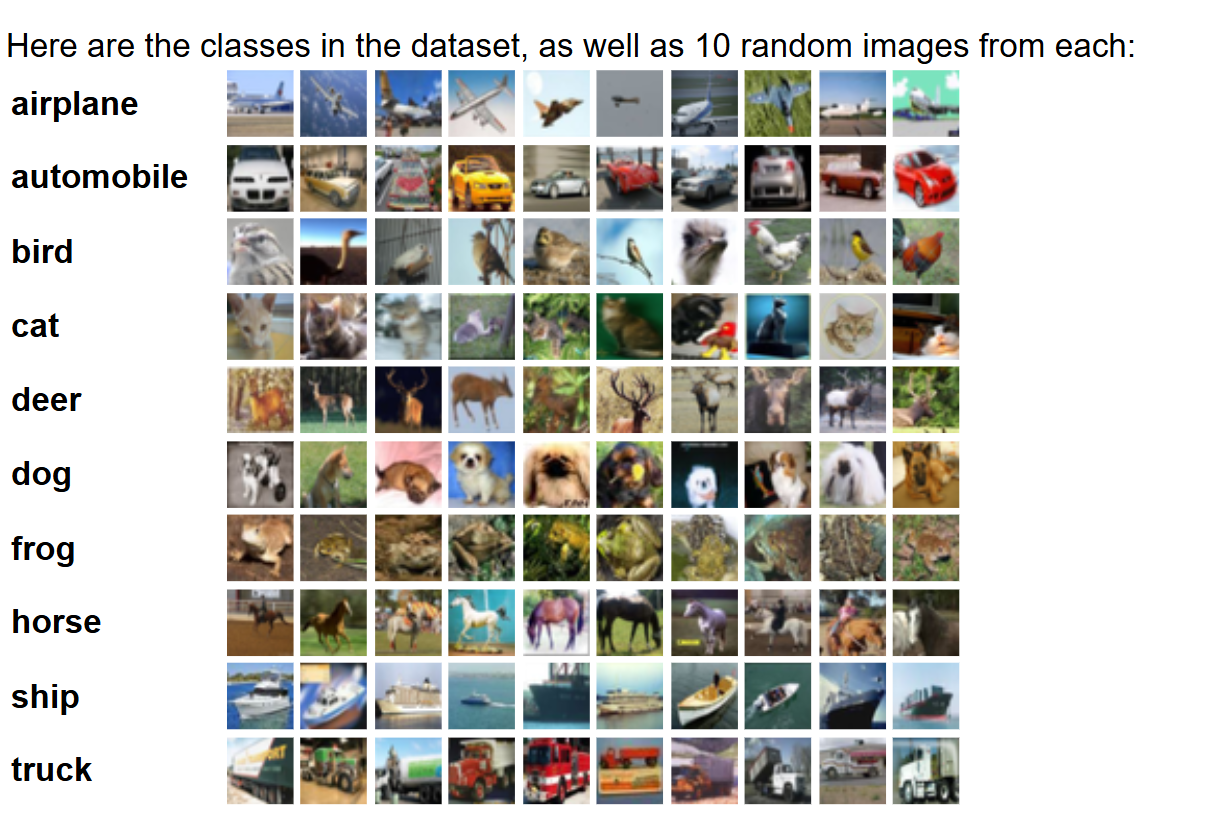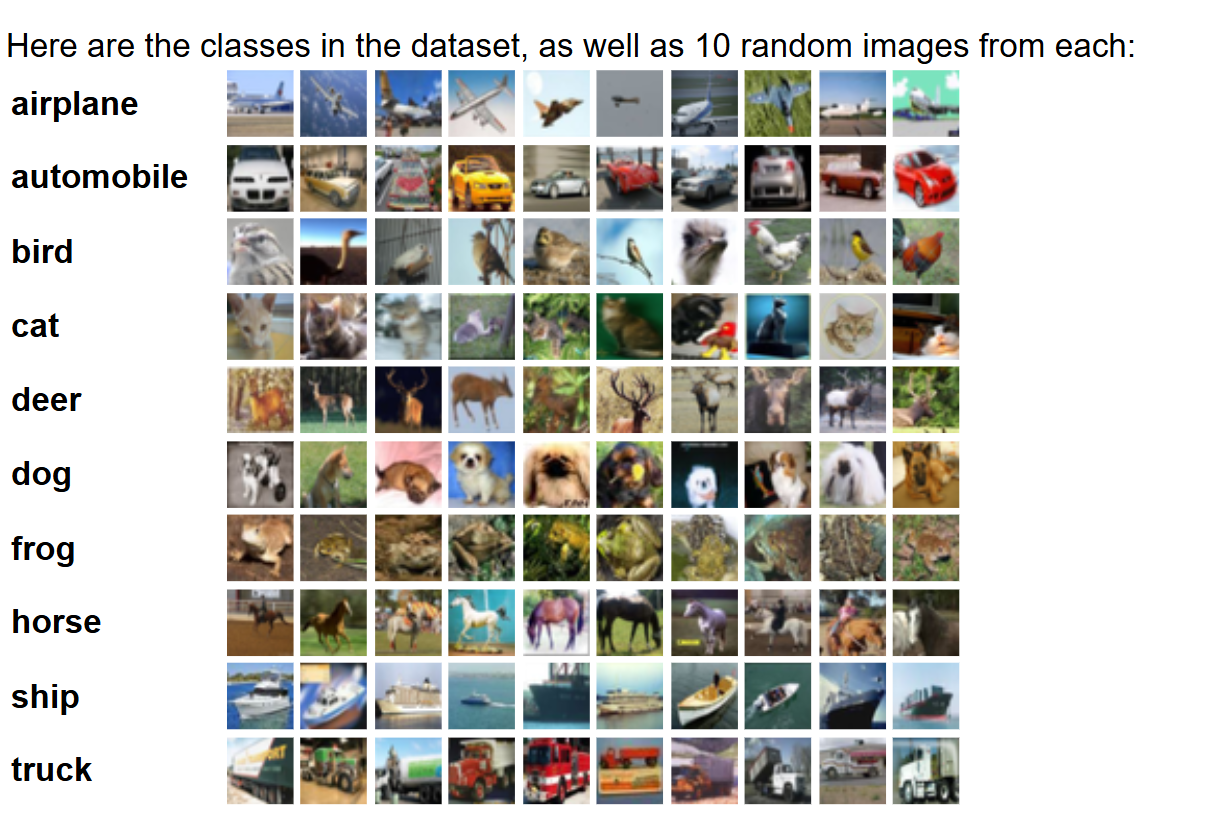

### Import the key libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

### 1. Download and prepare the `CIFAR-10` dataset



*   The CIFAR10 dataset contains **60,000 color images** in `10 classes`, with `6,000 images` in each class.
*   Dataset is divided into **50,000 training images** and **10,000 testing** images.

*  Classes are `mutually exclusive` and there is no overlap between them

In [2]:
print("In training dataset, there are", 50000/10, "images in each of the 10 categories")

In training dataset, there are 5000.0 images in each of the 10 categories


In [3]:
print("In testing dataset, there are", 10000/10, "images in each of the 10 categories")

In testing dataset, there are 1000.0 images in each of the 10 categories


-- Conclusion: Both training and testing datasets are `fully balanced datasets`

##### Loading the data

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() #loaded from TF/Keras datasets repo

In [5]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
train_labels.shape

(50000, 1)

In [7]:
train_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

### Let us plot and understand the original image along with `R`, `G`, and `B` channels

In [8]:
train_images.ndim

4

In [9]:
train_images.shape

(50000, 32, 32, 3)

In [10]:
train_images[0].shape

(32, 32, 3)

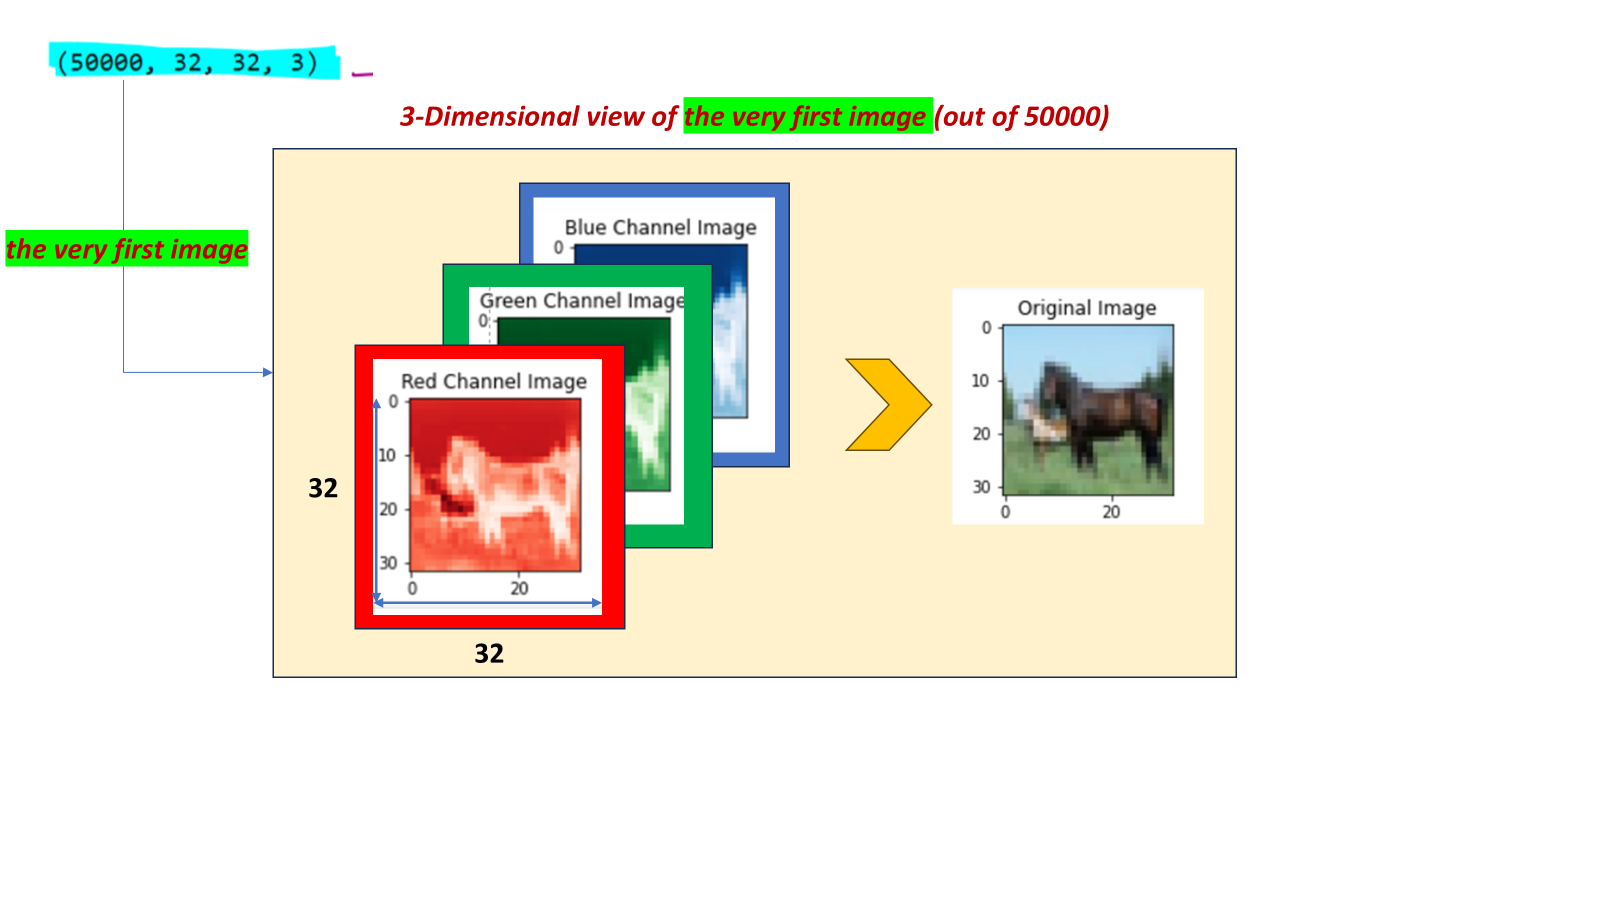!

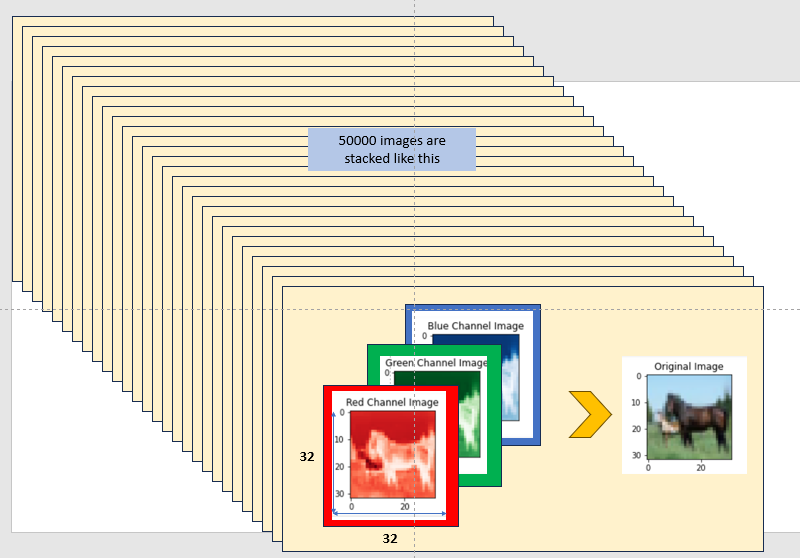

### Select one image `randomly` from the training set

In [11]:
image = train_images[12] #13th image out of 50000 images

###  Extract the R, G, B, Channels
R = image[:, :, 0] # extracts the first layer - one of the color channels from a color image --> RED
G = image[:, :, 1] # extracts the first layer - one of the color channels from a color image --> GREEN
B = image[:, :, 2] # extracts the first layer - one of the color channels from a color image --> BLUE

In [12]:
R.ndim

2

In [13]:
R

array([[164, 162, 162, ..., 157, 153, 153],
       [168, 166, 166, ..., 164, 160, 158],
       [172, 170, 171, ..., 168, 165, 163],
       ...,
       [123, 117, 112, ..., 117,  95, 120],
       [120, 116, 112, ..., 126, 120, 120],
       [121, 120, 116, ..., 124, 124, 120]], dtype=uint8)

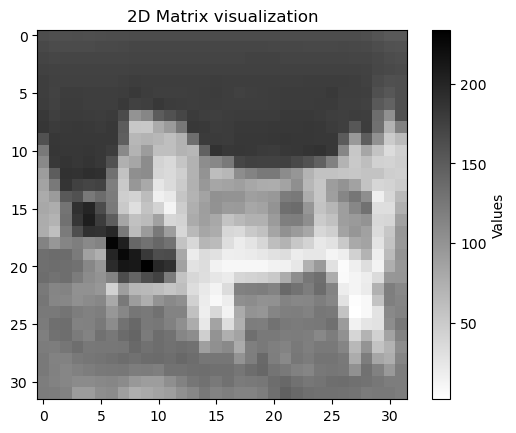

In [14]:
### visualize the 2D matric as a heatmap
plt.imshow(R, cmap='binary', interpolation='none')
plt.colorbar(label='Values')
plt.title('2D Matrix visualization')
plt.show()

-- Observation: Looks like a `horse` in the form of `32*32` pixels

### Display the original image along with RGB channels

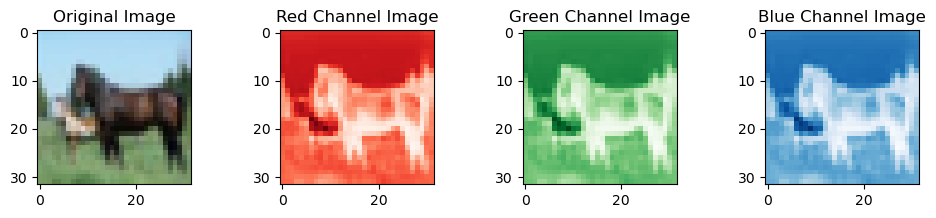

In [15]:
### Original Image
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,2)) ### setting up the canvas
axs[0].imshow(image)
axs[0].set_title("Original Image")

### Red channel image
axs[1].imshow(R, cmap='Reds')
axs[1].set_title("Red Channel Image")

### Green channel image
axs[2].imshow(R, cmap='Greens')
axs[2].set_title("Green Channel Image")

### Blue channel image
axs[3].imshow(R, cmap='Blues')
axs[3].set_title("Blue Channel Image")

plt.show()



### Task: Let us plot `first` 25 images from the training set and display the `class names below the each image`

In [16]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [18]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

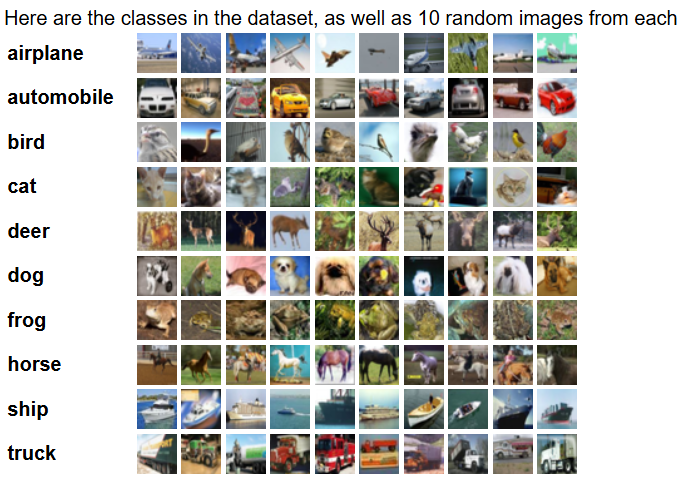

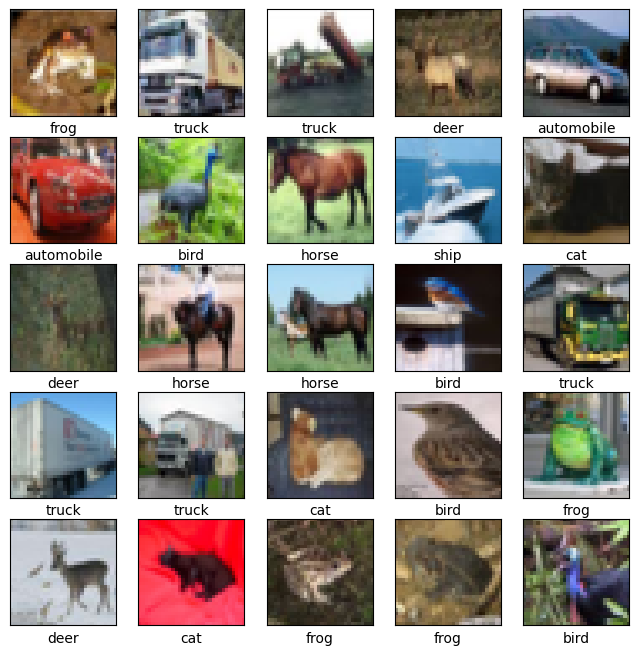

In [19]:
plt.figure(figsize=(8,8))

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()


### Let us create the `Convolutional Base` for the model

- `Conv1D` is used for the text

- **`Conv2D` is used for the images**

- `Conv3D` 3D is used for imaging, video processing

### Parameters of the `Conv2D` layers


*   `filters` - value of the filters show that `number of filters` from which CNN model and the Convolutional layer will learn from
*   `kernel-size` - a filter which will move through the image and extract the features of the part using a `dot` product. It basically means the dimension of the filter aka kernel which is `height` X `width`


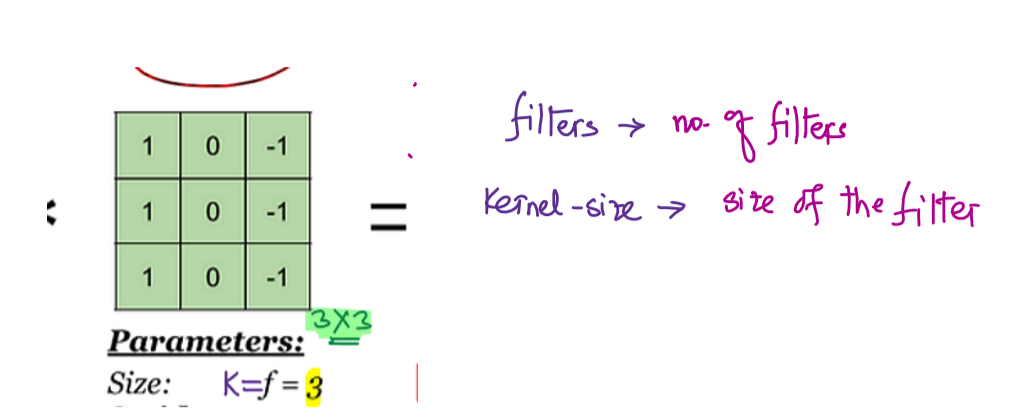

- Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

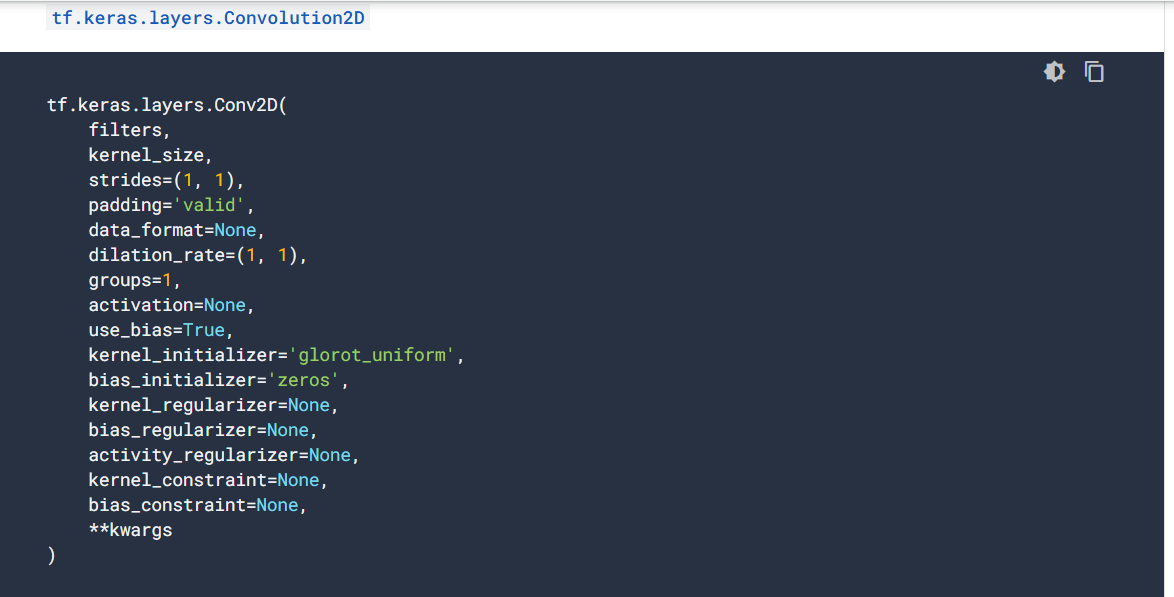

- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [31]:
model = models.Sequential() # model object --> created as a placeholder

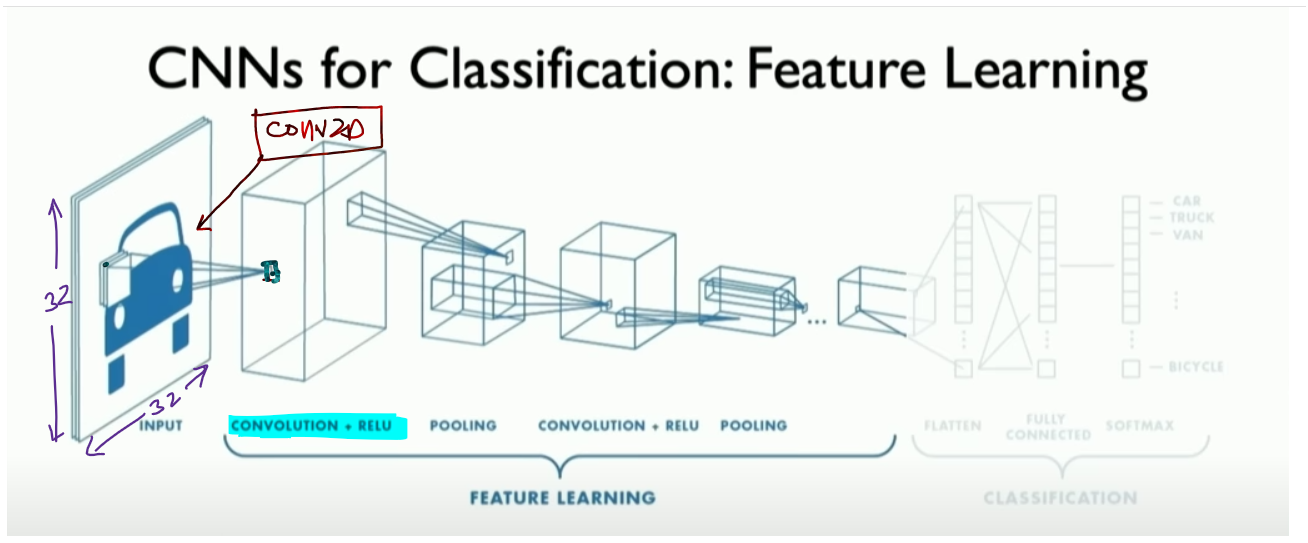

In [32]:
### FIRST CONVOLUTION + POOLING LAYER
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(32, 32, 3))) # Added a 2D convolutional layer with 32 filters, each having filter size 3X3
model.add(layers.MaxPool2D((2,2))) #adds a max pooling layer having pool size of 2 by 2 grid --> to reduce the spatial dimension by half

### SECOND CONVOLUTION + POOLING LAYER
model.add(layers.Conv2D(64, (3,3), activation = 'relu')) # Added a 2D convolutional layer with 64 filters, each having filter size 3X3
model.add(layers.MaxPool2D((2,2))) #adds a max pooling layer having pool size of 2 by 2 grid --> to reduce the spatial dimension by half

### THIRD CONVOLUTION (JUST FILTERING)
model.add(layers.Conv2D(64, (3,3), activation = 'relu')) # Added a 2D convolutional layer with 64 filters, each having filter size 3X3


C:\Users\think\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

### Show the `input-output relationship as a flow digram`

In [34]:
# pip install pydot
# pip install graphviz

In [35]:
import pydot
import graphviz
from tensorflow.keras.utils import plot_model

In [36]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [37]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True
    )

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


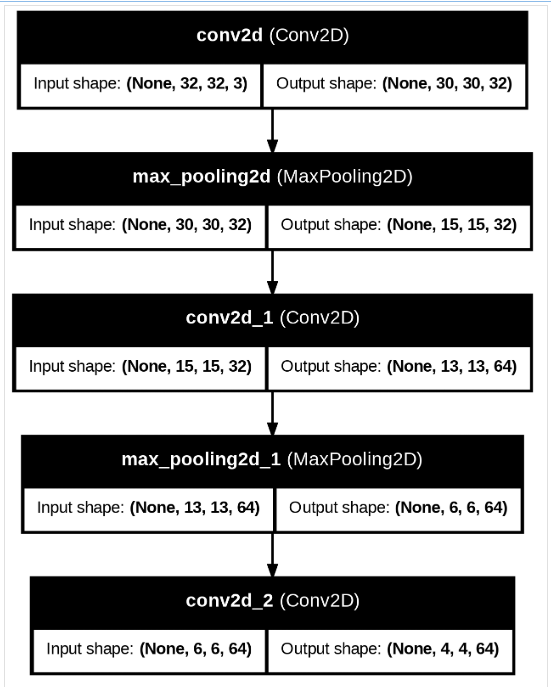

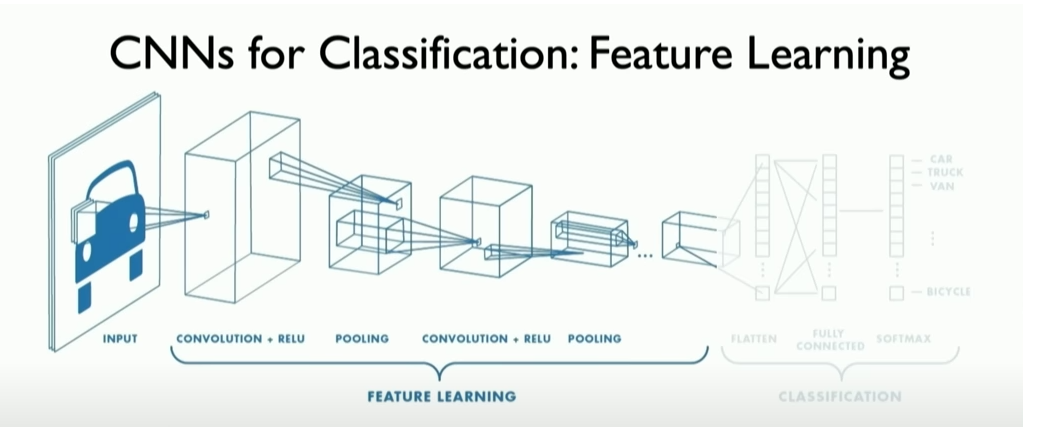

### Let us add `ANN layer` on top of the `CNN` layer

In [38]:
model.add(layers.Flatten()) # convert a multi-dimensional input coming from convolutional layer into a 1D vector
model.add(layers.Dense(64, activation='relu')) # a layer with 64 neurons and applying ReLU activation function
model.add(layers.Dense(10)) #Final fully connected layer with 10 neurons as its the output layer to predict 10 classes or categories

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

**NOTE:** - Even a `simple and shallow CNN model architecture` for `CIFAR-10` dataset needs to go through training of `122,770` (~**123K**) parameters

In [55]:
### Compile and train the model
model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'])

In [56]:
history = model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
 633/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3480 - loss: 1.8809

KeyboardInterrupt: 

In [45]:
15*25/60

6.25

**Conclusion:** - Model is `overfit`

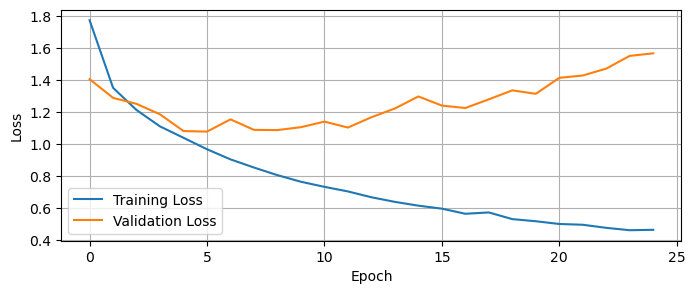

In [49]:
#plot
plt.figure(figsize=(8,3))
# plt.subplots(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

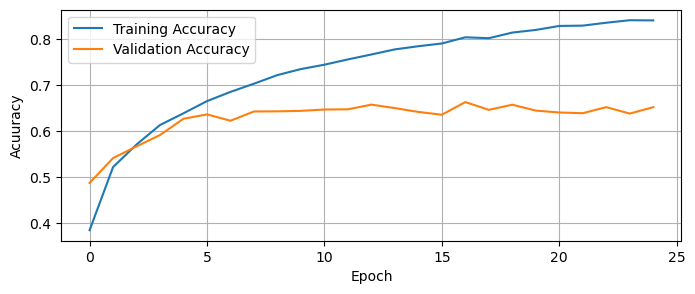

In [50]:
plt.figure(figsize=(8,3))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Acuuracy")
plt.legend()
plt.grid(True)

## Fine-tuning the convolutional `base` model

#### `BASE CONVOLUTIONAL MODEL`

In [ ]:
### FIRST CONVOLUTION + POOLING LAYER
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(32, 32, 3))) # Added a 2D convolutional layer with 32 filters, each having filter size 3X3
model.add(layers.MaxPool2D((2,2))) #adds a max pooling layer having pool size of 2 by 2 grid --> to reduce the spatial dimension by half

### SECOND CONVOLUTION + POOLING LAYER
model.add(layers.Conv2D(64, (3,3), activation = 'relu')) # Added a 2D convolutional layer with 64 filters, each having filter size 3X3
model.add(layers.MaxPool2D((2,2))) #adds a max pooling layer having pool size of 2 by 2 grid --> to reduce the spatial dimension by half

### THIRD CONVOLUTION (JUST FILTERING)
model.add(layers.Conv2D(64, (3,3), activation = 'relu')) # Added a 2D convolutional layer with 64 filters, each having filter size 3X3


### - Batch Normalization

In [51]:
del model

In [57]:
model = models.Sequential() # model object --> created as a placeholder

### FIRST CONVOLUTION + POOLING LAYER
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(32, 32, 3))) # Added a 2D convolutional layer with 32 filters, each having filter size 3X3
model.add(layers.MaxPool2D((2,2))) #adds a max pooling layer having pool size of 2 by 2 grid --> to reduce the spatial dimension by half

### SECOND CONVOLUTION + POOLING LAYER
model.add(layers.Conv2D(64, (3,3), activation = 'relu')) # Added a 2D convolutional layer with 64 filters, each having filter size 3X3

### Inserting a batch normalization layer here
model.add(layers.BatchNormalization()) #normalize the output of the convolution layer

model.add(layers.MaxPool2D((2,2))) #adds a max pooling layer having pool size of 2 by 2 grid --> to reduce the spatial dimension by half
### THIRD CONVOLUTION (JUST FILTERING)
model.add(layers.Conv2D(64, (3,3), activation = 'relu')) # Added a 2D convolutional layer with 64 filters, each having filter size 3X3

model.add(layers.BatchNormalization()) #normalize the output of the convolution layer

In [58]:
model.add(layers.Flatten()) # convert a multi-dimensional input coming from convolutional layer into a 1D vector
model.add(layers.Dense(64, activation='relu')) # a layer with 64 neurons and applying ReLU activation function
model.add(layers.Dense(10)) #Final fully connected layer with 10 neurons as its the output layer to predict 10 classes or categories

In [59]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,082 (480.79 KB)

 Trainable params: 122,826 (479.79 KB)

 Non-trainable params: 256 (1.00 KB)

In [60]:
### Compile and train the model
model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'])

In [61]:
history2 = model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.4299 - loss: 1.6235 - val_accuracy: 0.6013 - val_loss: 1.1150
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6346 - loss: 1.0319 - val_accuracy: 0.6498 - val_loss: 1.0033
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7008 - loss: 0.8537 - val_accuracy: 0.5561 - val_loss: 1.3262
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7397 - loss: 0.7390 - val_accuracy: 0.6326 - val_loss: 1.1333
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7721 - loss: 0.6516 - val_accuracy: 0.6966 - val_loss: 0.9181
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7921 - loss: 0.5846 - val_accuracy: 0.6767 - val_loss: 0.9602
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8180 - loss: 0.5167 - val_accuracy: 0.6993 - val_loss: 0.9354
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8381 -

### Capturing the performance of the `base` CNN model:

- epochs             : `25`
- training accuracy  : `85.8%`
- validation accuracy   : `64%`

**Conclusion: Model seems to be  `highly overfit`**

### Capturing the performance of the `base + batch normalization` CNN model:

- epochs             : `25`
- training accuracy  : `95 %`
- validation accuracy   : `68%`

**Conclusion: Model seems to be  still `highly overfit` however `batch-normalization did help with improving training accuracy**

### Let us add the `regualarization` and  `dropout` layers

In [73]:
del model

In [74]:
from tensorflow.keras.regularizers import l2

In [75]:
model = models.Sequential() # model object --> created as a placeholder

### Convolutional Layer
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32, 3))) #added a 2D convolutional layer with 32 filters having filter aka kernel size: 3X3, input_shape is images having dimensions: 32, 32, 3--> RGB channels
### Batch Normalization Layer
model.add(layers.BatchNormalization()) #normalizes the output of the convolution layer
### Max Pooling Layer
model.add(layers.MaxPool2D((2,2))) # adds a Max pooling layer with pool size of 2X2 --> to reduce the spatial dimension --> by half
### Dropout Layer
model.add(layers.Dropout(0.25))
### Convolutional layer with regularization
model.add(layers.Conv2D(64, (3,3), activation = 'relu', kernel_regularizer = l2(0.01))) #added another 2D convolutional layer with 64 filters having filter aka kernel size: 3X3, input_shape is images having dimensions: 32, 32, 3--> RGB channels

### Batch Normalization Layer
model.add(layers.BatchNormalization()) #normalizes the output of the convolution layer
### Max Pooling Layer
model.add(layers.MaxPool2D((2,2))) # adds another Max pooling layer with pool size of 2X2
### Dropout Layer
model.add(layers.Dropout(0.25))
### Convolutional layer
model.add(layers.Conv2D(64, (3,3), activation = 'relu')) #added another 2D convolutional layer with 64 filters having filter aka kernel size: 3X3, input_shape is images having dimensions: 32, 32, 3-->


In [76]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,704 (221.50 KB)

 Trainable params: 56,512 (220.75 KB)

 Non-trainable params: 192 (768.00 B)

In [77]:
model.add(layers.Flatten()) # convert a multi-dimensional input coming from convolutional layer into a 1D vector
model.add(layers.Dense(64, activation = 'relu')) # a layer with 64 neurons and applying activation function as ReLU
model.add(layers.Dense(10)) #Final fully connected layer with 10 neurons as it is the output layer of the model to predict 10 different categories

In [78]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'])

In [79]:
history3 = model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.3864 - loss: 1.9405 - val_accuracy: 0.5299 - val_loss: 1.4049
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5680 - loss: 1.2905 - val_accuracy: 0.6184 - val_loss: 1.1862
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.6321 - loss: 1.1220 - val_accuracy: 0.6468 - val_loss: 1.0813
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.6665 - loss: 1.0364 - val_accuracy: 0.6619 - val_loss: 1.0935
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6918 - loss: 0.9602 - val_accuracy: 0.6765 - val_loss: 1.0458
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7025 - loss: 0.9332 - val_accuracy: 0.6883 - val_loss: 0.9870
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7136 - loss: 0.9005 - val_accuracy: 0.6545 - val_loss: 1.1430
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7263 -

### NOTE TO MYSELF: `More better regularization techniques`

" - DropBlock "

" - SpatialDropout"

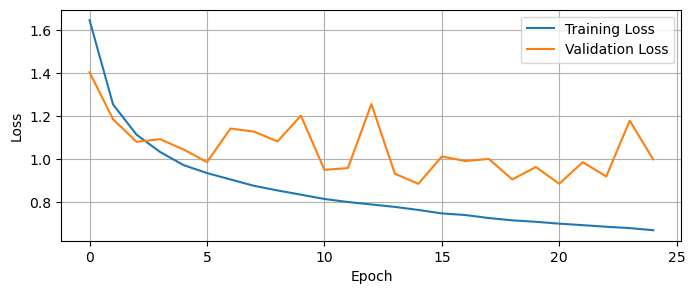

In [83]:
#plot
plt.figure(figsize=(8,3))
# plt.subplots(1,2,1)
plt.plot(history3.history['loss'],label='Training Loss')
plt.plot(history3.history['val_loss'],label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

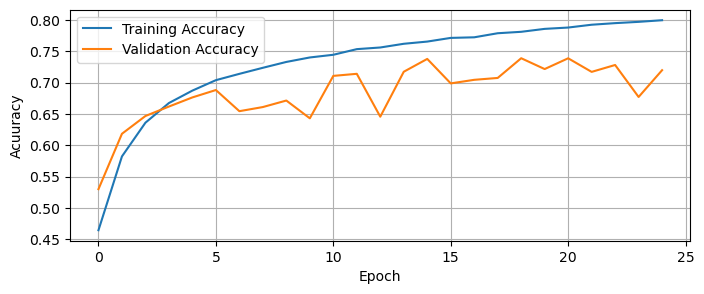

In [84]:
plt.figure(figsize=(8,3))
plt.plot(history3.history['accuracy'],label='Training Accuracy')
plt.plot(history3.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Acuuracy")
plt.legend()
plt.grid(True)

### Capturing the performance of the `base + batch normalization` CNN model:

- epochs             : `25`
- training accuracy  : `80 %`
- validation accuracy   : `72%`

**Conclusion: Model seems to be really stable and overfit has been addressed however with more fine-tuning and increasing epochs would improve the overall accuracy**

-- `Try to reach 90+ accuracy`

### NEXT STEPS

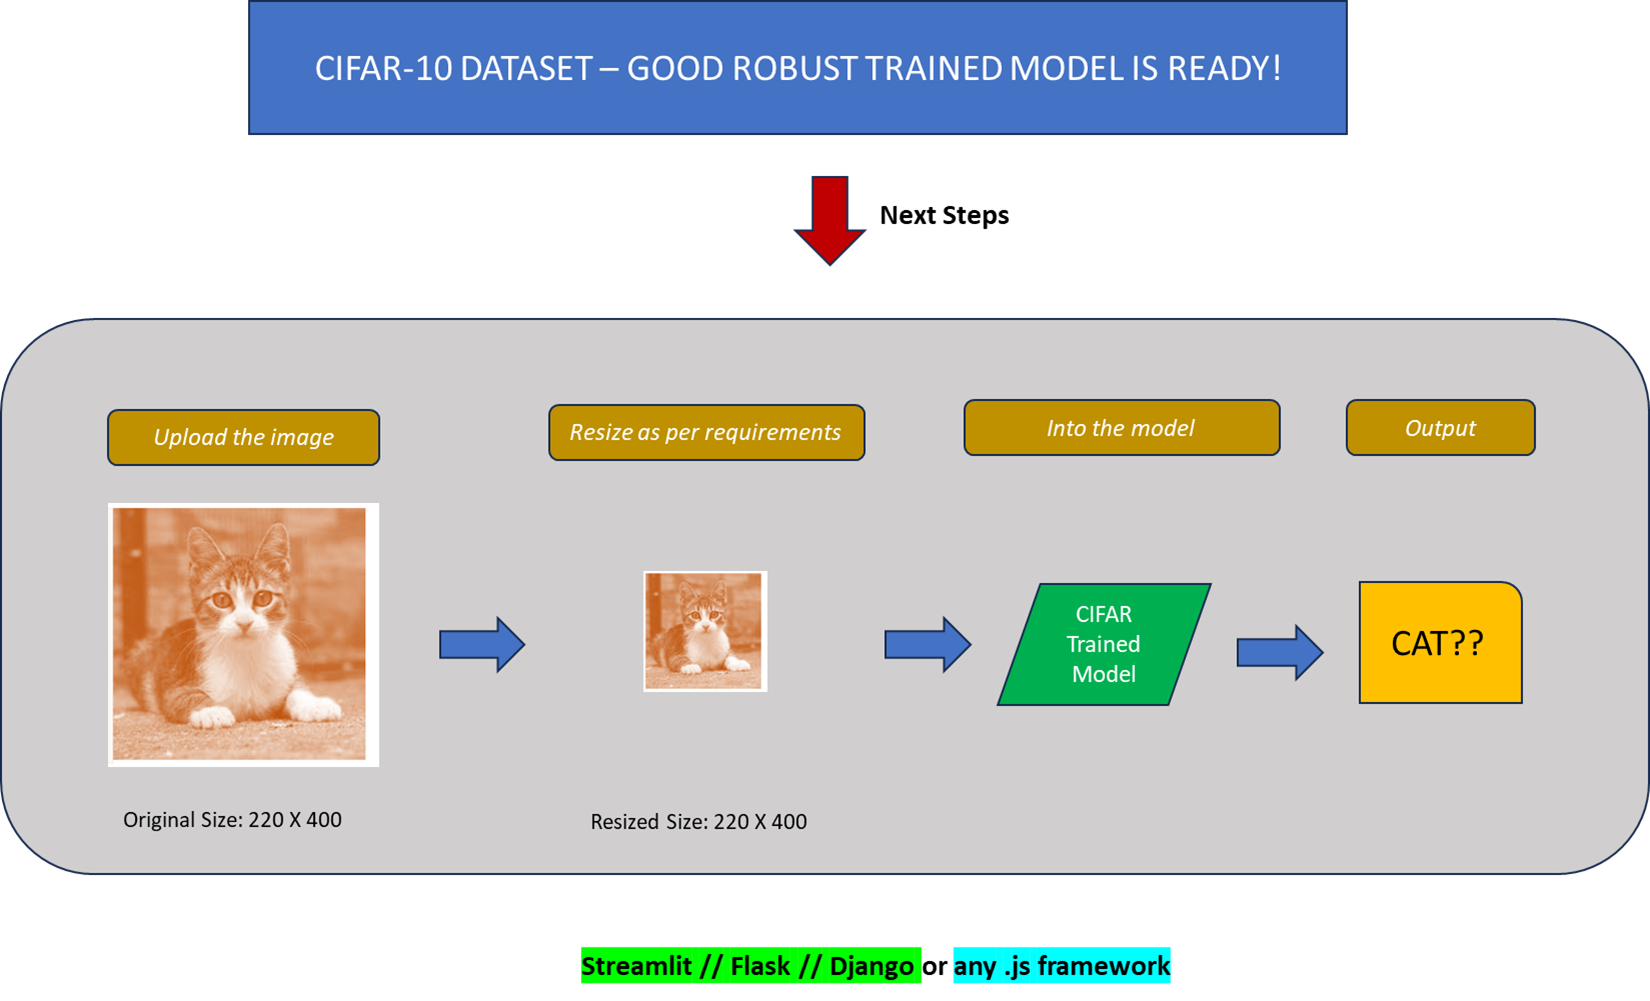